# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

response = requests.get(query_url + 'tarakan').json()
pprint(response)                        

{'base': 'model',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': 3.3, 'lon': 117.63},
 'dt': 1580002753,
 'id': 1624725,
 'main': {'feels_like': 306.3,
          'grnd_level': 1011,
          'humidity': 79,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 301.48,
          'temp_max': 301.48,
          'temp_min': 301.48},
 'name': 'Tarakan',
 'rain': {'3h': 2.56},
 'sys': {'country': 'ID', 'sunrise': 1579990961, 'sunset': 1580034039},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 101, 'speed': 1.7}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={weather_api_key}&q="

city_name = []
cloud = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

record = 1 

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        time.sleep(0.5)
        record= record + 1
        
    except KeyError:
        print('Moving On to Next City')
    except NameError:
        print('Moving On to Next City')
    continue



Moving On to Next City
Processing Record 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=ushuaia
Moving On to Next City
Processing Record 2 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=vaini
Processing Record 3 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=nanortalik
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=busselton
Processing Record 5 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=rikitea
Processing Record 6 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=yellowknife
Processing Record 7 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=kaeo
Processing Record 8 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=mar del plata
Processing Record 9 | Ous
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=ous
Processing Reco

Processing Record 77 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=eureka
Processing Record 78 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=tasiilaq
Processing Record 79 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=hithadhoo
Moving On to Next City
Processing Record 80 | Newala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=newala
Processing Record 81 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=tiksi
Processing Record 82 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=saint george
Processing Record 83 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=bud
Processing Record 84 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=carnarvon
Processing Record 85 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=new norfolk
Processing Record 86 | Punta 

Moving On to Next City
Processing Record 152 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=chicama
Processing Record 153 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=ostrovnoy
Processing Record 154 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=avera
Processing Record 155 | Mosetse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=mosetse
Processing Record 156 | Kirkwall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=kirkwall
Processing Record 157 | Marabu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=miri
Processing Record 158 | Nagato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=nagato
Processing Record 159 | Ludwigslust
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=ludwigslust
Processing Record 160 | Termoli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=termoli
Processing Record 161 | Bere

Processing Record 228 | Akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=akdepe
Moving On to Next City
Processing Record 229 | Martinsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=martinsville
Processing Record 230 | Stepnyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=stepnyak
Processing Record 231 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=provideniya
Processing Record 232 | Nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=nishihara
Processing Record 233 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=riyadh
Processing Record 234 | Ardatov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=ardatov
Processing Record 235 | Naica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=naica
Processing Record 236 | General MacArthur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=general macart

Processing Record 302 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=yerbogachen
Processing Record 303 | Zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=zeya
Moving On to Next City
Processing Record 304 | Molina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=molina
Processing Record 305 | Bahir Dar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=bahir dar
Processing Record 306 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=pisco
Processing Record 307 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=pringsewu
Processing Record 308 | Manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=manta
Processing Record 309 | Teacapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=teacapan
Processing Record 310 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=kamenka
Processing Record 311 | Voinea

Processing Record 378 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=imbituba
Moving On to Next City
Processing Record 379 | Baculin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=baculin
Processing Record 380 | Staroye Drozhzhanoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=staroye drozhzhanoye
Processing Record 381 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=olafsvik
Processing Record 382 | Chimbote
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=chimbote
Processing Record 383 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=zhigansk
Processing Record 384 | Douglas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=douglas
Processing Record 385 | Tayga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=tayga
Processing Record 386 | Nogliki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=nogliki
Pr

Processing Record 454 | Kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=kampot
Processing Record 455 | Fairmount
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=fairmount
Processing Record 456 | Sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=sorland
Processing Record 457 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=noumea
Moving On to Next City
Processing Record 458 | Cooma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=cooma
Processing Record 459 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=nome
Processing Record 460 | Rocky Mountain House
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=rocky mountain house
Processing Record 461 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=klyuchi
Processing Record 462 | Palauig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=palauig
Processing Recor

Processing Record 529 | Erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=erenhot
Processing Record 530 | San Gabriel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=san gabriel
Moving On to Next City
Processing Record 531 | Lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=lerwick
Processing Record 532 | Mporokoso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=mporokoso
Processing Record 533 | Rovaniemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=rovaniemi
Processing Record 534 | Lekoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=lekoni
Processing Record 535 | Chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=chifeng
Processing Record 536 | Tenenkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=tenenkou
Processing Record 537 | Piet Retief
http://api.openweathermap.org/data/2.5/weather?units=Imperial&&q=piet retief
Processi

In [8]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data.to_csv('Output_CSV/weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,90,AR,1580002384,81,-54.80,-68.30,50.00,28.86
1,Vaini,90,TO,1580002425,88,-21.20,-175.20,80.60,12.75
2,Nanortalik,100,GL,1580002712,75,60.14,-45.24,23.34,16.98
3,Busselton,97,AU,1580002588,33,-33.65,115.33,84.00,5.23
4,Rikitea,0,PF,1580002622,77,-23.12,-134.97,79.11,10.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

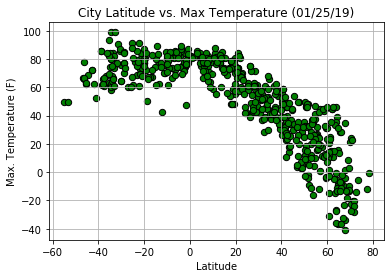

In [37]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=40, color='g', edgecolors= "black")

plt.title("City Latitude vs. Max Temperature (01/25/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("Output_Plots/Latitude_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

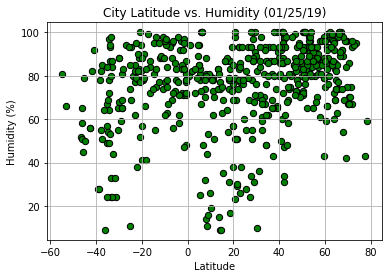

In [38]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=40, color='g', edgecolors= "black")

plt.title("City Latitude vs. Humidity (01/25/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Output_Plots/Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

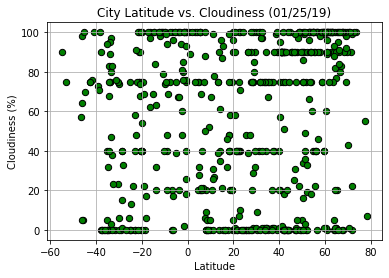

In [39]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=40, color='g', edgecolors= "black")

plt.title("City Latitude vs. Cloudiness (01/25/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Output_Plots/Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

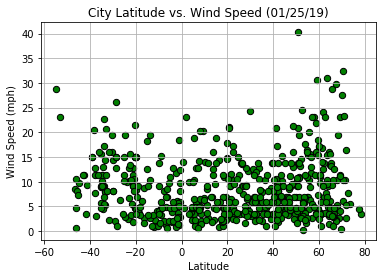

In [36]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=40, color='g', edgecolors= "black")

plt.title("City Latitude vs. Wind Speed (01/25/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Output_Plots/Latitude_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [73]:
# OPTIONAL: Create a function to create Linear Regression plots

def regression(x_values, y_values, best_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors= "black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,best_position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [74]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data["Lat"] >= 0.0]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Nanortalik,100,GL,1580002712,75,60.14,-45.24,23.34,16.98
5,Yellowknife,90,CA,1580002539,85,62.46,-114.35,10.40,6.93
8,Ous,100,RU,1580002762,97,60.91,61.52,1.62,3.60
9,Haines Junction,100,CA,1580002727,99,60.75,-137.51,-14.78,5.93
10,Bow Island,5,CA,1580002764,80,49.87,-111.37,35.60,6.93
...,...,...,...,...,...,...,...,...,...
552,Kushima,75,JP,1580003101,93,31.46,131.23,51.80,11.41
553,Ixtapa,90,MX,1580003102,100,20.70,-105.20,71.01,5.82
554,Cheremkhovo,66,RU,1580003103,89,53.16,103.07,10.24,5.64
555,Igualada,100,ES,1580002987,100,41.58,1.62,53.01,2.24


In [75]:
southern_df = weather_data.loc[weather_data["Lat"] < 0.0]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,90,AR,1580002384,81,-54.80,-68.30,50.00,28.86
1,Vaini,90,TO,1580002425,88,-21.20,-175.20,80.60,12.75
3,Busselton,97,AU,1580002588,33,-33.65,115.33,84.00,5.23
4,Rikitea,0,PF,1580002622,77,-23.12,-134.97,79.11,10.22
6,Kaeo,5,NZ,1580002592,57,-35.10,173.78,84.00,8.99
...,...,...,...,...,...,...,...,...,...
537,Tambopata,100,PE,1580003092,95,-12.73,-69.18,74.53,1.10
539,Opuwo,6,NA,1580003093,41,-18.06,13.84,66.04,4.88
541,Hervey Bay,75,AU,1580003095,74,-25.30,152.85,88.00,11.41
546,Brits,6,ZA,1580003098,93,-25.63,27.78,60.01,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8660624687948244


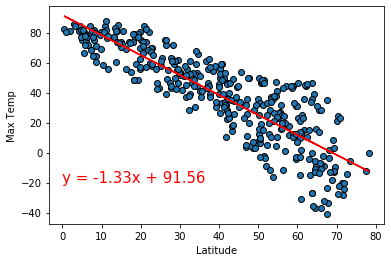

<Figure size 432x288 with 0 Axes>

In [88]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
best_position = (0, -20)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Northern_Latitude_vs_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.29759255950878166


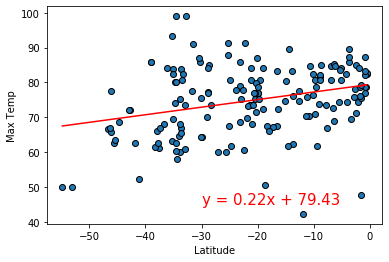

<Figure size 432x288 with 0 Axes>

In [89]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
best_position = (-30, 45)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Southern_Latitude_vs_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32194169644668685


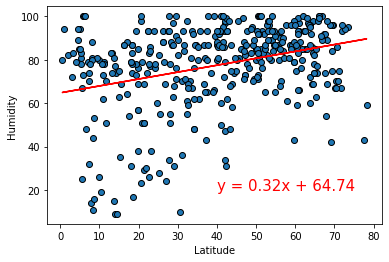

<Figure size 432x288 with 0 Axes>

In [90]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
best_position = (40,20)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Northern_Latitude_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3627889433428233


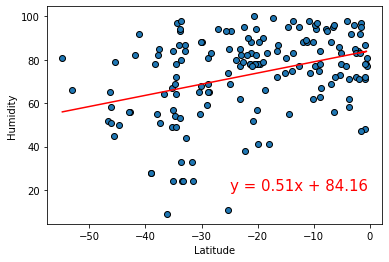

<Figure size 432x288 with 0 Axes>

In [91]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
best_position = (-25,20)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Southern_Latitude_vs_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2617293755422723


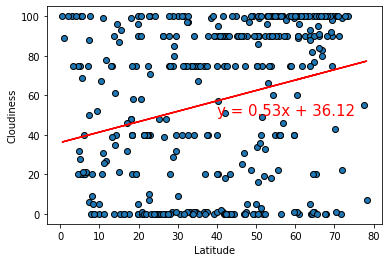

<Figure size 432x288 with 0 Axes>

In [92]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
best_position = (40,50)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Northern_Latitude_vs_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23112022054702394


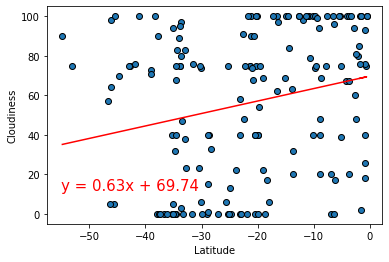

<Figure size 432x288 with 0 Axes>

In [93]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
best_position = (-55,12)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Southern_Latitude_vs_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16826340115322463


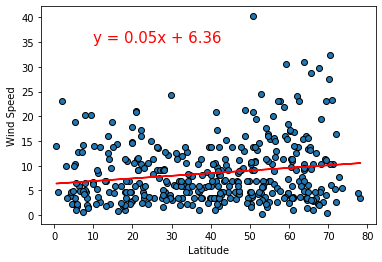

<Figure size 432x288 with 0 Axes>

In [95]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
best_position = (10,35)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Northern_Latitude_vs_Wind_Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4044957965696023


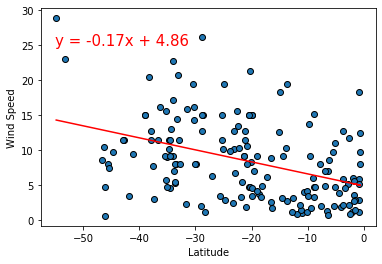

<Figure size 432x288 with 0 Axes>

In [98]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
best_position = (-55,25)
regression(x_values,y_values,best_position)

plt.savefig("Output_Plots/Southern_Latitude_vs_Wind_Speed.png")